## 회귀분석 과정

### 1. 변수간 상관관계 및 다중공선성 확인
- 몇몇 변수간 높은 상관관계를 가짐 -> 다중공선성 의심
- 기초생활수급 총 가구수, 기초생활 총 수급권자 수, 노인총인구수, 평균소득 등 다중공선성 높게 나옴 
- (1) 기초생활수급 총가구수 VS 기초생활수급권자 수 (2) 계총인구수 VS 노인총인구수 (3) 영역둘레 VS 영역면적간 높은상관 
- 위 세 가지 높은 상관을 가지는 변수그룹중 한 가지만 선택해야 함 

### 2. 회귀모형 적합 (몇 가지 방법)
- 종속변수, 독립변수 표준화 변환
- 변수선택법을 이용한 회귀모형 선별
- 라쏘를 이용한 회귀모형 선별
- 선별된 모형의 회귀진단 (표준화 변환 안된 원변수 모형 vs 변수선택법을 이용한 모형들 vs 라쏘를 이용한 모형)

### 3. 최종 모형 선정
- 회귀진단 결과, 유의한 모형간 비교
- 최종 회귀모형 선정
- 선정된 회귀모형을 이용한 노인의료소외지역 선정

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm #
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [2]:
df=pd.read_csv('C:/Users/koaro/OneDrive/바탕 화면/경남공모전/변수 종합.csv')
df = df.replace(',', '', regex=True) # 쉼표 제거
df.iloc[:, 3:] = df.iloc[:, 3:].apply(pd.to_numeric) # 수치형 변환

In [48]:
df.head(1)

,행정구역,자치구,행정동,계총인구수,노인총인구수,평균소득,총가구수,영역둘레(평균상권),영역면적(평균상권),기초생활수급 총 가구수,기초생활 총 수급권자 수,버스정류장 수,의료기관수,1 의료기관 당 노인인구,1 의료기관 당 기초생활수급권자 수,행정동 면적,상권 개수,중위연령,평균 공시지가
0,경상남도 창원시 의창구 동읍,의창구,동읍,19125,4408,2487.0,10357,4285.776603,1354115.787,676,922,NaN,16,401.3125,57,59.75,44,50,55500000.0


### vif 살펴보기

In [11]:
x = df.iloc[:,3:] 
x = x.drop(columns=['1 의료기관 당 노인인구','버스정류장 수'])
y = df['1 의료기관 당 노인인구']

In [12]:
# 각 독립 변수들의 VIF 계산
vif = pd.DataFrame()
vif["Variable"] = x.columns[:]
# 각 독립 변수들의 VIF 계산
vif["VIF"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]

In [13]:
vif.sort_values(by="VIF", ascending=False)

,Variable,VIF
6,기초생활수급 총 가구수,395.850732
7,기초생활 총 수급권자 수,373.182256
1,노인총인구수,74.371648
2,평균소득,54.108716
12,중위연령,50.107132
0,계총인구수,46.758020
4,영역둘레(평균상권),18.570965
13,평균 공시지가,16.203351
5,영역면적(평균상권),13.273758
11,상권 개수,7.784616


- 기초생활수급 총 가구수, 기초생활 총 수급권자 수 => 다중공선성 높음
- 변수제외: 기초생활수급 총 가구수

In [82]:
x2 = x.drop(columns=['기초생활수급 총 가구수'])

# 각 독립 변수들의 VIF 계산
vif = pd.DataFrame()
vif["Variable"] = x2.columns[:]
# 각 독립 변수들의 VIF 계산
vif["VIF"] = [variance_inflation_factor(x2, i) for i in range(x2.shape[1])]

In [84]:
vif.sort_values(by="VIF", ascending=False)

,Variable,VIF
1,노인총인구수,64.995554
2,평균소득,53.247413
11,중위연령,49.712761
0,계총인구수,39.754446
4,영역둘레(평균상권),18.550602
12,평균 공시지가,16.112011
5,영역면적(평균상권),13.271386
6,기초생활 총 수급권자 수,11.471776
10,상권 개수,7.691901
9,행정동 면적,4.625337


### 상관관계 시각화

In [91]:
new = df.iloc[:,3:]
new = new.drop(columns=['버스정류장 수','기초생활수급 총 가구수'])

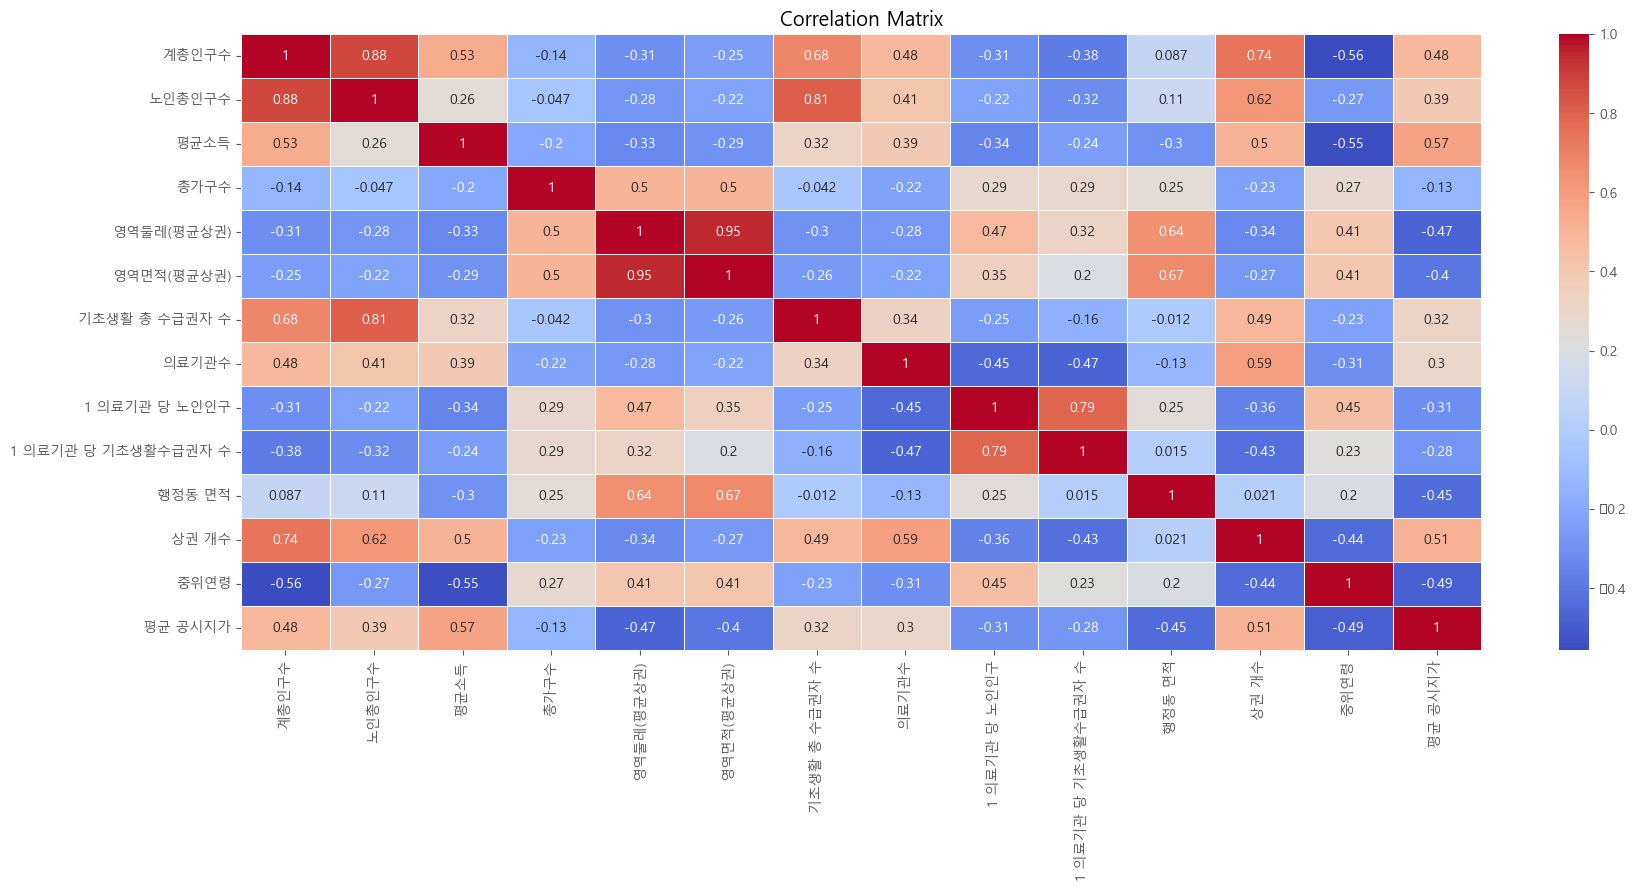

In [100]:
plt.figure(figsize=(20, 8))
sns.heatmap(data=new.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- 계총인구수, 노인총인구수 상관관계: 0.88
- 영역둘레, 영역면적 상관관계: 0.95
#### 변수 제거 필요 

### EDA 요약
- 빼야할 변수 목록 (두 변수중 하나 제거)
#### (1) 기초생활수급 총가구수 VS 기초생활수급권자 수 
#### (2) 계총인구수 VS 노인총인구수
#### (3) 영역둘레 VS 영역면적
#### (4) 중위연령 (5세단위로 집계 -> 잘못계산됨) 

#### 저는 노인총인구수, 영역둘레, 기초생활수급권자 수 뺐습니다
#### 중위연령도 잘못계산된거라 뺐습니다
#### 자치구(의창구, 합포구 이런거) 원핫인코딩도 했습니다

In [65]:
x =df.iloc[:,1:]
x = x.drop(columns=['행정동','노인총인구수','영역둘레(평균상권)','버스정류장 수','기초생활 총 수급권자 수','1 의료기관 당 노인인구','중위연령'])
y = df['1 의료기관 당 노인인구']

In [68]:
one_hot_encoded = pd.get_dummies(x['자치구'], prefix='자치구')

# 원핫인코딩 결과를 기존 데이터프레임에 추가
x = pd.concat([x, one_hot_encoded], axis=1)
x = x.iloc[:,1:]

In [21]:
vif = pd.DataFrame()
vif["Variable"] = x.iloc[:,:10].columns[:]
# 각 독립 변수들의 VIF 계산
vif["VIF"] = [variance_inflation_factor(x.iloc[:,:10], i) for i in range(x.iloc[:,:10].shape[1])]
vif.sort_values(by="VIF", ascending=False)

,Variable,VIF
1,평균소득,17.152686
9,평균 공시지가,14.245005
0,계총인구수,9.072952
8,상권 개수,7.571217
4,기초생활수급 총 가구수,5.992571
2,총가구수,4.236868
7,행정동 면적,3.779909
3,영역면적(평균상권),3.289716
5,의료기관수,3.105152
6,1 의료기관 당 기초생활수급권자 수,2.791238


#### 위의 사전 변수 제거를 통해 다중공선성 문제 어느정도 해결

### 독립변수, 종속변수 히스토그램

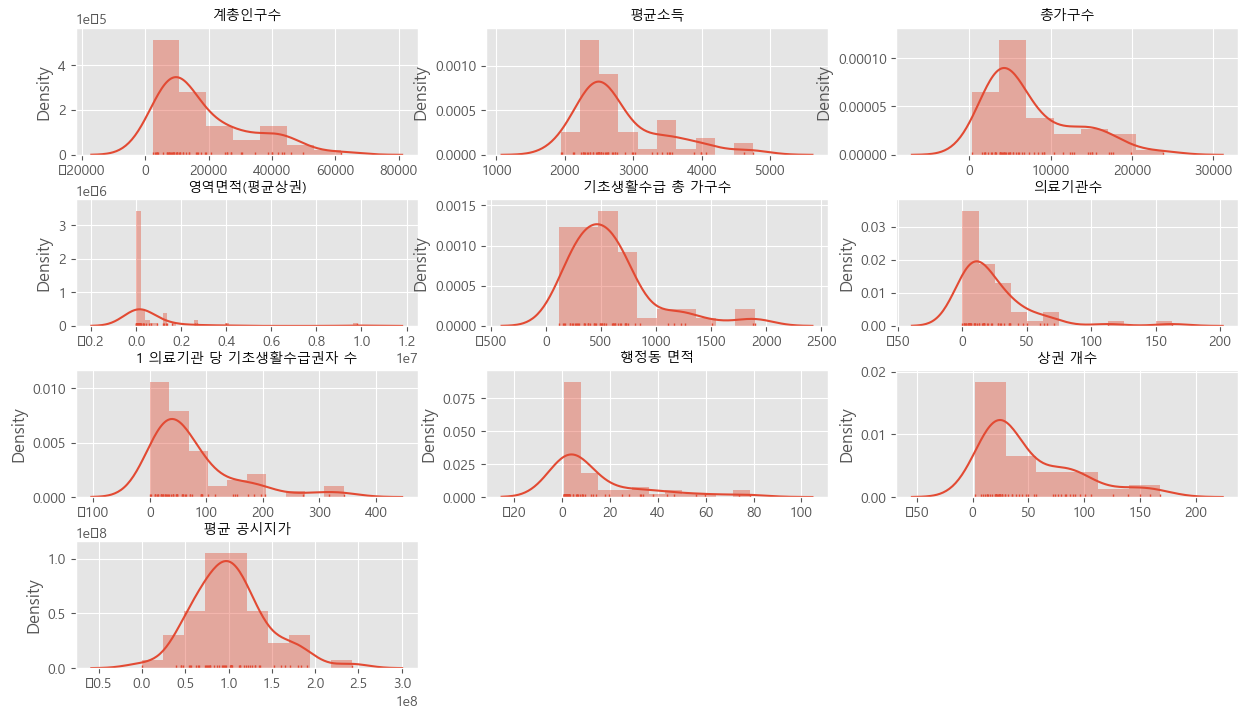

In [89]:
plt.figure(figsize=(15, 8)) # 가로, 세로 
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35) #서브플롯 간 간격 조정

for i in range(len(x.iloc[:,:10].columns)):
  col = x.columns[i]

  plt.subplot(4, 3, i+1)
  sns.distplot(x=x[col], kde=True, rug=True)
  plt.title(col, fontsize=10)

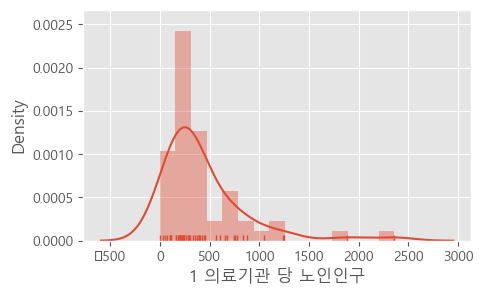

In [97]:
plt.figure(figsize=(5,3))
sns.distplot(y, kde=True, rug=True)
plt.show();

### 종속변수 vs 독립변수 산점도 확인

(1) y변수 로그변환 적용안한 산점도

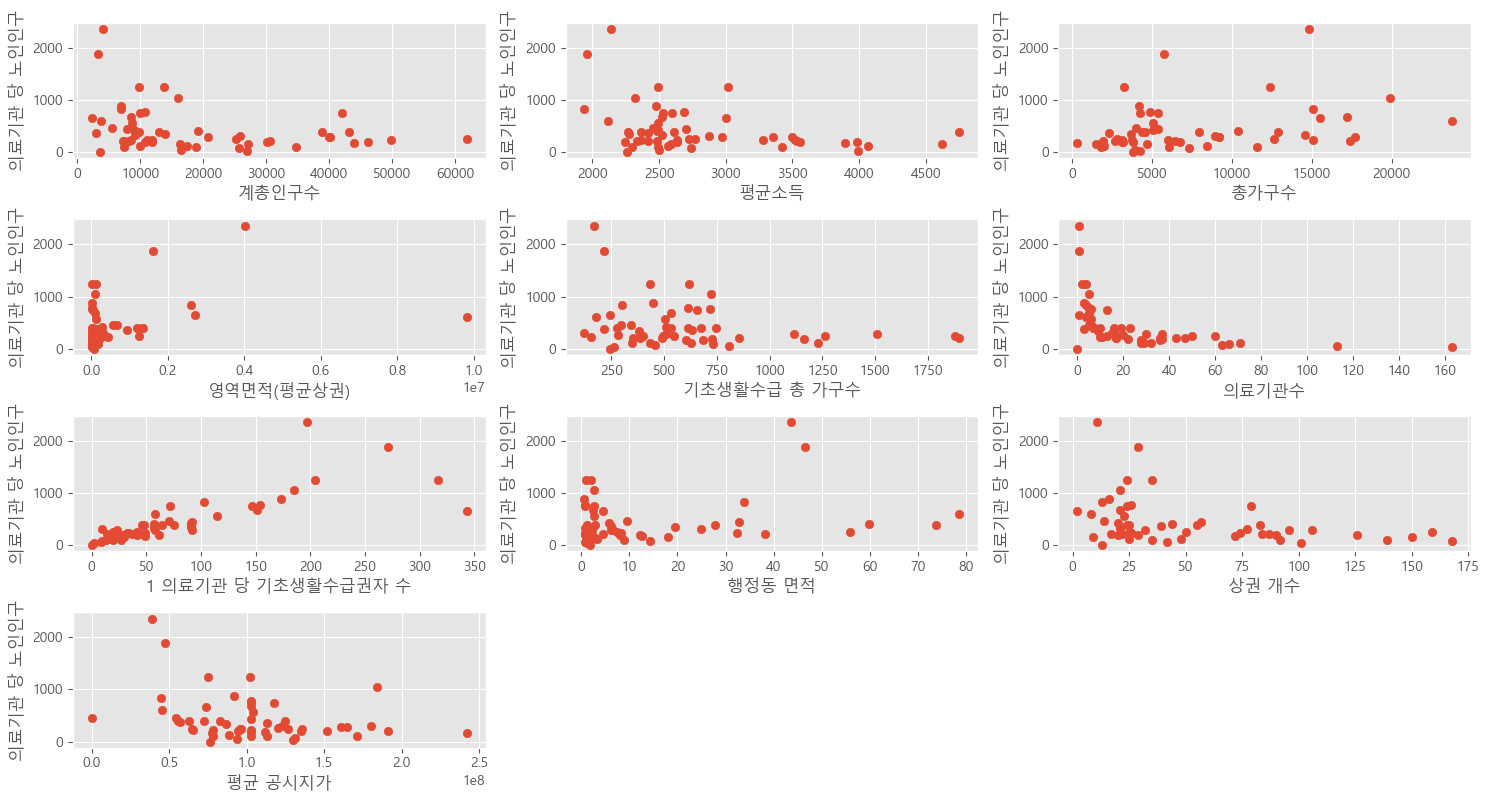

In [94]:
plt.figure(figsize=(15, 8)) # 가로, 세로 
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35) #서브플롯 간 간격 조정

for i in range(len(x.iloc[:,:10].columns)):
    col = x.columns[i]

    plt.subplot(4, 3, i+1)
    plt.scatter(x[col], y)
    plt.xlabel(col)
    plt.ylabel('의료기관 당 노인인구')

plt.tight_layout()
plt.show()

### 데이터 표준화

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 표준화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### 회귀분석1
- 앞서 제외한 변수를 뺀 모든 변수 사용

In [24]:
# 훈련 세트와 테스트 세트 분할
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [25]:
# 회귀분석 모델 학습
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

# 회귀분석 모델 평가
train_score = regression_model.score(x_train, y_train)
test_score = regression_model.score(x_test, y_test)
print("Train R^2 Score:", train_score)
print("Test R^2 Score:", test_score)

Train R^2 Score: 0.6671998066356821
Test R^2 Score: 0.7300924948225784


In [26]:
# 상수항 추가
x_train = sm.add_constant(x_train)

# OLS 모델 학습
model = sm.OLS(y_train, x_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          1 의료기관 당 노인인구   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     3.294
Date:                Sun, 18 Jun 2023   Prob (F-statistic):            0.00554
Time:                        15:22:43   Log-Likelihood:                -264.24
No. Observations:                  38   AIC:                             558.5
Df Residuals:                      23   BIC:                             583.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        409.0820     58.037      7.049      0.000     289.023     529.141
x1           117.9294    114.980      1.026      0.316    -119.924     355.783
x2          -111.3641    116.462     -0.956      0.349    -352.284     129.556
x3            11.9765     86.488      0.138      0.891    -166.938     190.891
x4            -8.5599    104.622     -0.082      0.935    -224.987     207.867
x5          -127.6458    118.596     -1.076      0.293    -372.980     117.688
x6            -8.6262     83.525     -0.103      0.919    -181.411     164.158
x7           300.4615     70.221      4.279      0.000     155.198     445.725
x8            78.3646    119.831      0.654      0.520    -169.524     326.253
x9           -13.2416    100.357     -0.132      0.896    -220.846     194.363
x10           10.9015    126.355      0.086      0.932    -250.484     272.287
x11           41.0800     55.221      0.744      0.464     -73.154     155.314
x12           -9.4810     62.262     -0.152      0.880    -138.280     119.318
x13            4.1810     74.682      0.056      0.956    -150.310     158.672
x14          -44.1132     65.266     -0.676      0.506    -179.125      90.899
x15           -2.7110     54.143     -0.050      0.960    -114.714     109.292
==============================================================================
Omnibus:                       30.438   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.677
Skew:                           1.368   Prob(JB):                     1.59e-39
Kurtosis:                      13.265   Cond. No.                     1.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.49e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
# 학습데이터의 잔차 확인

res = results.resid
pred_y = results.predict(x_train) # train_x 데이터를 이용해 모델의 예측값을 계산
residuals = y_train - pred_y # 잔차(residual)를 계산

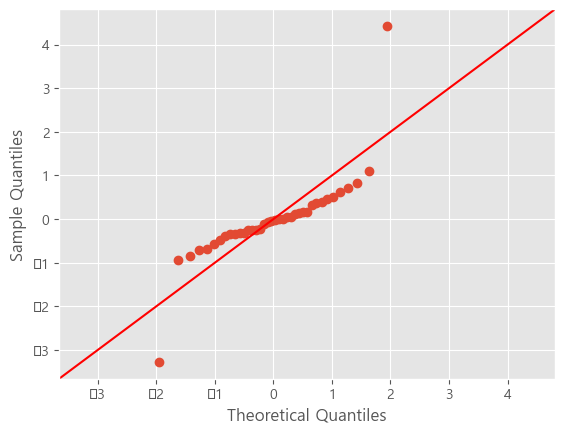

In [28]:
sm.qqplot(res,fit = True,line = '45') # q-q plot을 통한 잔차의 정규분포 확인
plt.show();

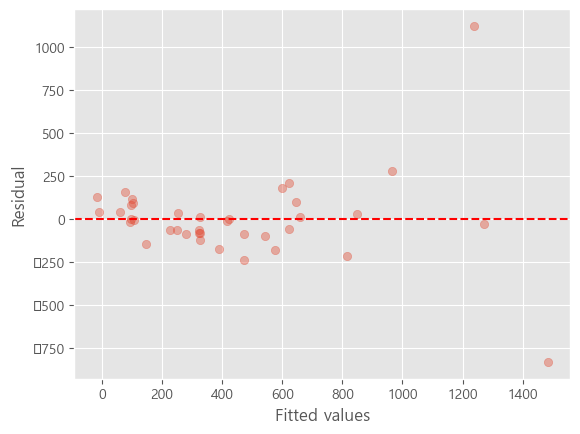

In [29]:
plt.scatter(pred_y, residuals, alpha=0.4)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.axhline(y=0, color='red', linestyle='--')
plt.show();

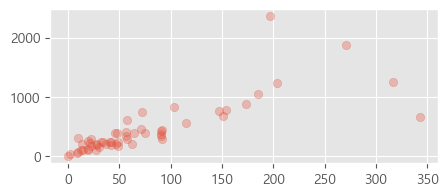

In [38]:
plt.figure(figsize=(5,2))
plt.scatter(x['1 의료기관 당 기초생활수급권자 수'], y,alpha=0.3)
plt.show();

In [110]:
model = sm.OLS(y, sm.add_constant(x['1 의료기관 당 기초생활수급권자 수']))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          1 의료기관 당 노인인구   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     88.95
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           6.26e-13
Time:                        16:52:45   Log-Likelihood:                -385.16
No. Observations:                  55   AIC:                             774.3
Df Residuals:                      53   BIC:                             778.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  93.6996     51.648      1.814      0.075      -9.893     197.292
1 의료기관 당 기초생활수급권자 수     4.5374      0.481      9.431      0.000       3.572       5.502
==============================================================================
Omnibus:                       45.839   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.290
Skew:                           1.732   Prob(JB):                    2.05e-102
Kurtosis:                      16.869   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
model = sm.OLS(y, sm.add_constant(x.drop('1 의료기관 당 기초생활수급권자 수', axis=1)))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          1 의료기관 당 노인인구   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     2.206
Date:                Sun, 18 Jun 2023   Prob (F-statistic):             0.0272
Time:                        16:53:12   Log-Likelihood:                -397.67
No. Observations:                  55   AIC:                             823.3
Df Residuals:                      41   BIC:                             851.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          311.2651    353.126      0.881      0.383    -401.887    1024.417
계총인구수            0.0013      0.007      0.182      0.857      -0.013       0.016
평균소득             0.0871      0.147      0.591      0.558      -0.211       0.385
총가구수             0.0130      0.012      1.100      0.278      -0.011       0.037
영역면적(평균상권)    -2.85e-05   6.64e-05     -0.429      0.670      -0.000       0.000
기초생활수급 총 가구수    -0.1628      0.225     -0.725      0.473      -0.616       0.291
의료기관수           -4.2663      2.386     -1.788      0.081      -9.085       0.552
행정동 면적           3.7703      5.354      0.704      0.485      -7.042      14.583
상권 개수           -0.5294      2.349     -0.225      0.823      -5.273       4.214
평균 공시지가      -1.324e-06   1.86e-06     -0.711      0.481   -5.08e-06    2.44e-06
자치구_마산합포구      368.9230    110.304      3.345      0.002     146.159     591.687
자치구_마산회원구       72.7034    109.718      0.663      0.511    -148.876     294.283
자치구_성산구        -44.7479    238.831     -0.187      0.852    -527.077     437.581
자치구_의창구         26.1623    173.736      0.151      0.881    -324.705     377.030
자치구_진해구       -111.7757    131.105     -0.853      0.399    -376.548     152.997
==============================================================================
Omnibus:                       28.628   Durbin-Watson:                   2.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.838
Skew:                           1.574   Prob(JB):                     6.15e-14
Kurtosis:                       7.078   Cond. No.                     1.39e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### x7변수 (기초생활수급) 빼고는 다 유의확률이 높음
#### 그러면 이 회귀모델은 아마 x7변수만 사용했을 때의 모델과도 유사할 것
#### 이 때, 종속변수와 x7변수간의 산점도를 보면 3개 점을 빼면 완벽한 선형관계를 그리고 있음
#### 이 3개 정도의 이상점을 제거하고 만든 회귀식으로 회귀계수를 이용해 가중치를 준다면 과연 55개의 모든 행정동을 판단하는게 옳을까?
#### 그렇다면 이런식의 회귀모델링보다는 군집화가 더 나은 방향성이 아닐까?
#### 군집화할 때, 회귀에서 유의한 모형으로 군집화?
#### 아니면 x7변수 (기초생활수급)를 빼고 회귀?

### 로그변환한 뒤 회귀분석

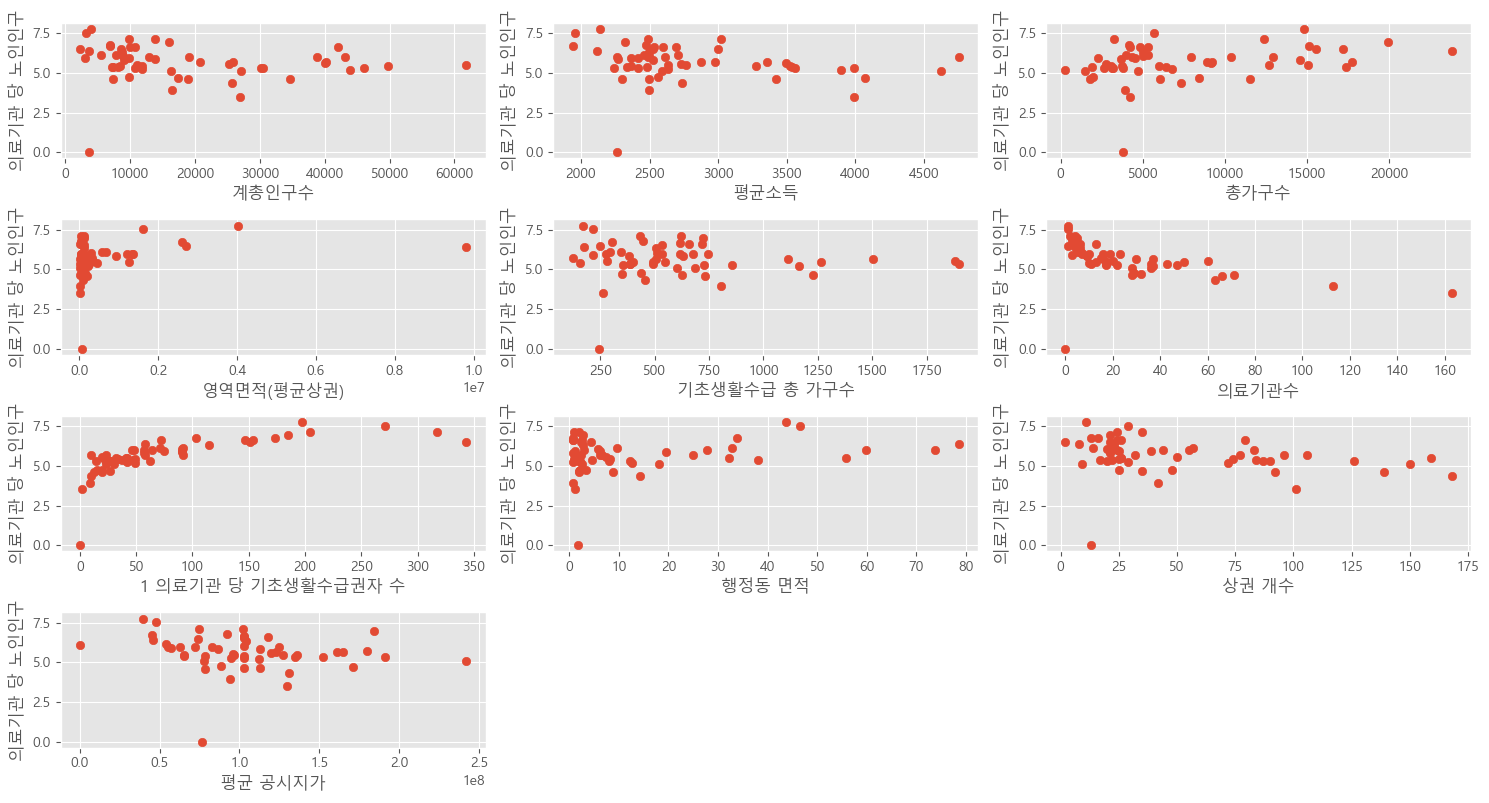

In [45]:
plt.figure(figsize=(15, 8)) # 가로, 세로 
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35) #서브플롯 간 간격 조정

for i in range(len(x.iloc[:,:10].columns)):
    col = x.columns[i]

    plt.subplot(4, 3, i+1)
    plt.scatter(x[col], np.log1p(y))
    plt.xlabel(col)
    plt.ylabel('의료기관 당 노인인구')

plt.tight_layout()
plt.show()

In [91]:
new_x = x.copy()

for i in range(10):
    new_x.iloc[:, i] = np.log1p(new_x.iloc[:, i])

In [112]:
model = sm.OLS(np.log1p(y), sm.add_constant(new_x))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          1 의료기관 당 노인인구   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     112.3
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.55e-27
Time:                        16:53:31   Log-Likelihood:                 16.622
No. Observations:                  55   AIC:                            -3.245
Df Residuals:                      40   BIC:                             26.87
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.6380      1.671      3.374      0.002       2.261       9.015
계총인구수                   0.5460      0.085      6.440      0.000       0.375       0.717
평균소득                   -0.6605      0.244     -2.706      0.010      -1.154      -0.167
총가구수                    0.0499      0.041      1.230      0.226      -0.032       0.132
영역면적(평균상권)             -0.1134      0.062     -1.831      0.075      -0.239       0.012
기초생활수급 총 가구수           -0.9697      0.088    -10.988      0.000      -1.148      -0.791
의료기관수                   0.2681      0.053      5.099      0.000       0.162       0.374
1 의료기관 당 기초생활수급권자 수     1.2461      0.042     30.011      0.000       1.162       1.330
행정동 면적                  0.1168      0.077      1.511      0.139      -0.039       0.273
상권 개수                  -0.0423      0.080     -0.528      0.600      -0.204       0.120
평균 공시지가                 0.0127      0.015      0.832      0.410      -0.018       0.044
자치구_마산합포구               1.1588      0.306      3.789      0.000       0.541       1.777
자치구_마산회원구               1.1555      0.307      3.769      0.001       0.536       1.775
자치구_성산구                 1.2044      0.402      2.997      0.005       0.392       2.017
자치구_의창구                 1.1192      0.357      3.137      0.003       0.398       1.840
자치구_진해구                 1.0001      0.341      2.934      0.006       0.311       1.689
==============================================================================
Omnibus:                        6.020   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.324
Skew:                          -0.537   Prob(JB):                       0.0698
Kurtosis:                       4.081   Cond. No.                     2.92e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.02e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 로그변환 시, 대부분 p-value가 낮아짐
#### 유의확률 기각안되는 놈들 리스트

- 상권 개수(0.600), 평균 공시지가(0.410), 총 가구수(0.226), 행정동 면적(0.139)

#### 아래 회귀모형 요약

#### 종속변수, 독립변수(가변수 제외) 로그변환
#### 상권 개수, 평균 공시지가, 총 가구수, 행정동 면적 p-value 확인 후 제외

In [116]:
col = ['상권 개수','평균 공시지가','총가구수','행정동 면적']

model = sm.OLS(np.log1p(y), sm.add_constant(new_x.drop(col,axis=1)))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          1 의료기관 당 노인인구   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     157.3
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           4.95e-31
Time:                        16:56:09   Log-Likelihood:                 14.072
No. Observations:                  55   AIC:                            -6.143
Df Residuals:                      44   BIC:                             15.94
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.9420      1.587      3.744      0.001       2.743       9.141
계총인구수                   0.5702      0.071      7.976      0.000       0.426       0.714
평균소득                   -0.7737      0.233     -3.326      0.002      -1.243      -0.305
영역면적(평균상권)             -0.0298      0.025     -1.197      0.238      -0.080       0.020
기초생활수급 총 가구수           -0.9599      0.087    -11.023      0.000      -1.135      -0.784
의료기관수                   0.2670      0.052      5.147      0.000       0.162       0.372
1 의료기관 당 기초생활수급권자 수     1.2454      0.041     30.641      0.000       1.163       1.327
자치구_마산합포구               1.1945      0.288      4.147      0.000       0.614       1.775
자치구_마산회원구               1.1884      0.288      4.126      0.000       0.608       1.769
자치구_성산구                 1.2985      0.384      3.384      0.002       0.525       2.072
자치구_의창구                 1.2134      0.334      3.628      0.001       0.539       1.888
자치구_진해구                 1.0471      0.330      3.170      0.003       0.381       1.713
==============================================================================
Omnibus:                        5.289   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.162
Skew:                          -0.379   Prob(JB):                       0.0757
Kurtosis:                       4.295   Cond. No.                     2.73e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.64e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [127]:
res = results.resid
pred_y = results.predict(sm.add_constant(new_x.drop(col,axis=1))) # train_x 데이터를 이용해 모델의 예측값을 계산
residuals = np.log1p(y) - pred_y # 잔차(residual)를 계산

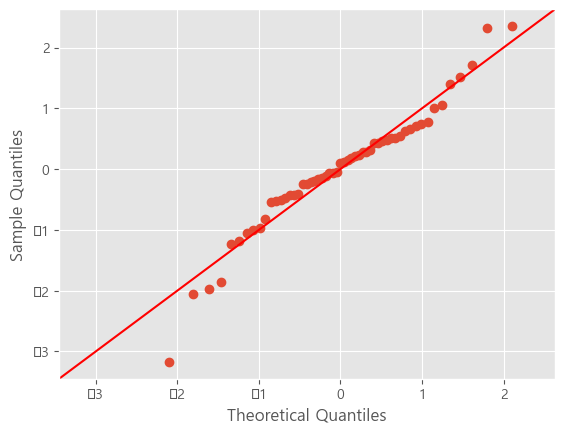

In [128]:
sm.qqplot(res,fit = True,line = '45') # q-q plot을 통한 잔차의 정규분포 확인
plt.show();

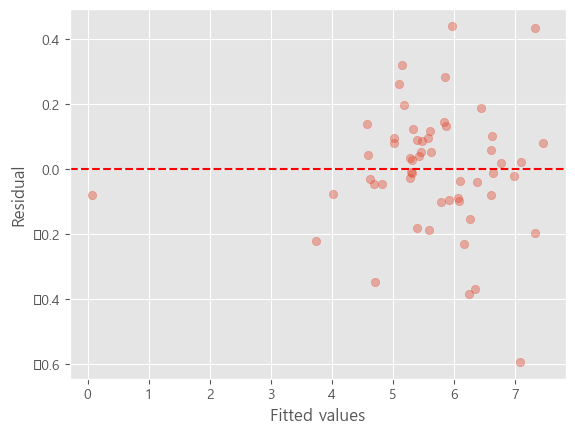

In [129]:
plt.scatter(pred_y, residuals, alpha=0.4)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.axhline(y=0, color='red', linestyle='--')
plt.show();

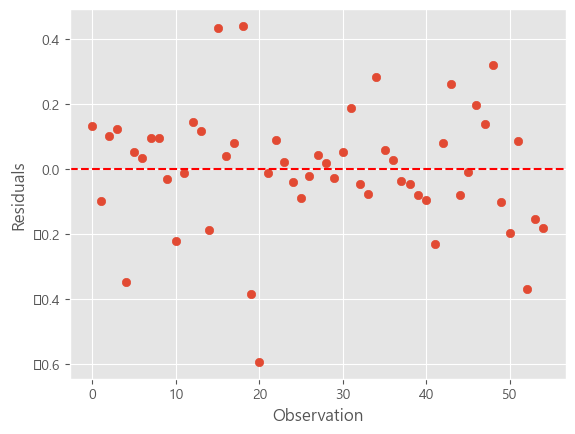

In [132]:
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.show()

#### 회귀진단 결과: 잔차 독립성, 등분산성, 정규성 모두 만족